In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import datetime as dt
import numpy as np

In [4]:
AMAqui=pd.read_csv('data/AMAquitaine.csv')

In [5]:
AMIDF=pd.read_csv('data/AMIDF.csv')

In [6]:
AMOcci=pd.read_csv('data/AMOccitanie.csv')

In [7]:
AMPACA=pd.read_csv('data/AMPACA.csv')

In [8]:
AMRA=pd.read_csv('data/AMRA.csv')

In [9]:
AM=pd.merge(AMRA,AMAqui, on='Semaine')

In [10]:
AM=pd.merge(AM, AMPACA, on='Semaine')

In [11]:
AM=pd.merge(AM, AMOcci, on='Semaine')

In [12]:
AM=pd.merge(AM, AMIDF, on='Semaine')

In [13]:
AM

,Semaine,Rhone-Alpes,Aquitaine,Provence-Alpes-Cote d'Azur,Occitanie,Ile-de-France
0,2020-01-05,9,0,4,0,0
1,2020-01-12,0,0,8,5,8
2,2020-01-19,5,4,0,5,5
3,2020-01-26,9,4,9,0,11
4,2020-02-02,4,0,8,0,19
...,...,...,...,...,...,...
307,2021-12-26,0,0,0,0,2
308,2021-12-26,0,0,0,0,2
309,2021-12-26,0,0,0,0,2
310,2021-12-26,0,0,0,0,2


In [14]:
AM.rename(columns={'Semaine': 'Dates'}, inplace=True)

In [15]:
AM['Dates'].apply(lambda x: x.replace('-',' ').replace(' ',' ')).astype('datetime64')

0     2020-01-05
1     2020-01-12
2     2020-01-19
3     2020-01-26
4     2020-02-02
         ...    
307   2021-12-26
308   2021-12-26
309   2021-12-26
310   2021-12-26
311   2021-12-26
Name: Dates, Length: 312, dtype: datetime64[ns]

In [16]:
AM.groupby(by=["Dates"], dropna=False).sum()

,Rhone-Alpes,Aquitaine,Provence-Alpes-Cote d'Azur,Occitanie,Ile-de-France
Dates,,,,,
2020-01-05,9,0,4,0,0
2020-01-12,0,0,8,5,8
2020-01-19,5,4,0,5,5
2020-01-26,9,4,9,0,11
2020-02-02,4,0,8,0,19
...,...,...,...,...,...
2021-11-28,0,0,20,0,15
2021-12-05,0,0,0,50,5
2021-12-12,15,0,0,0,15


In [17]:
AM = AM.melt(id_vars=["Dates"],
               var_name="Region",
              value_name="occurrence d'anti-moustique")

In [18]:
AM

,Dates,Region,occurrence d'anti-moustique
0,2020-01-05,Rhone-Alpes,9
1,2020-01-12,Rhone-Alpes,0
2,2020-01-19,Rhone-Alpes,5
3,2020-01-26,Rhone-Alpes,9
4,2020-02-02,Rhone-Alpes,4
...,...,...,...
1555,2021-12-26,Ile-de-France,2
1556,2021-12-26,Ile-de-France,2
1557,2021-12-26,Ile-de-France,2
1558,2021-12-26,Ile-de-France,2


In [19]:
QistaAquitaine=pd.read_csv('Data/QistaAqui20.csv')

In [20]:
QistaOccitanie=pd.read_csv('Data/QistaOcci20.csv')

In [21]:
QistaIDF=pd.read_csv('Data/QistaIDF20.csv')

In [22]:
QistaPACA=pd.read_csv('Data/QistaPACA20.csv')

In [23]:
QistaRA=pd.read_csv('Data/QistaRA20.csv')

In [24]:
Qista20=pd.merge(QistaRA,QistaPACA, on='Semaine')

In [25]:
Qista20=pd.merge(Qista20,QistaAquitaine, on='Semaine')

In [26]:
Qista20=pd.merge(Qista20,QistaIDF, on='Semaine')

In [27]:
Qista20=pd.merge(Qista20,QistaOccitanie, on='Semaine')

In [28]:
Qista20.rename(columns={'Semaine': 'Date'}, inplace=True)

In [29]:
Qista20['Date'].apply(lambda x: x.replace('-',' ').replace(' ',' ')).astype('datetime64')

0     2020-01-05
1     2020-01-12
2     2020-01-19
3     2020-01-26
4     2020-02-02
         ...    
99    2021-11-28
100   2021-12-05
101   2021-12-12
102   2021-12-19
103   2021-12-26
Name: Date, Length: 104, dtype: datetime64[ns]

In [30]:
#Qista20['Date']=pd.DatetimeIndex(Qista20['Date']).month #Laisser en semaines pr être en accord avec Adja

In [31]:
Qista20= Qista20.groupby('Date').sum()

Text(0, 0.5, 'Mesures')

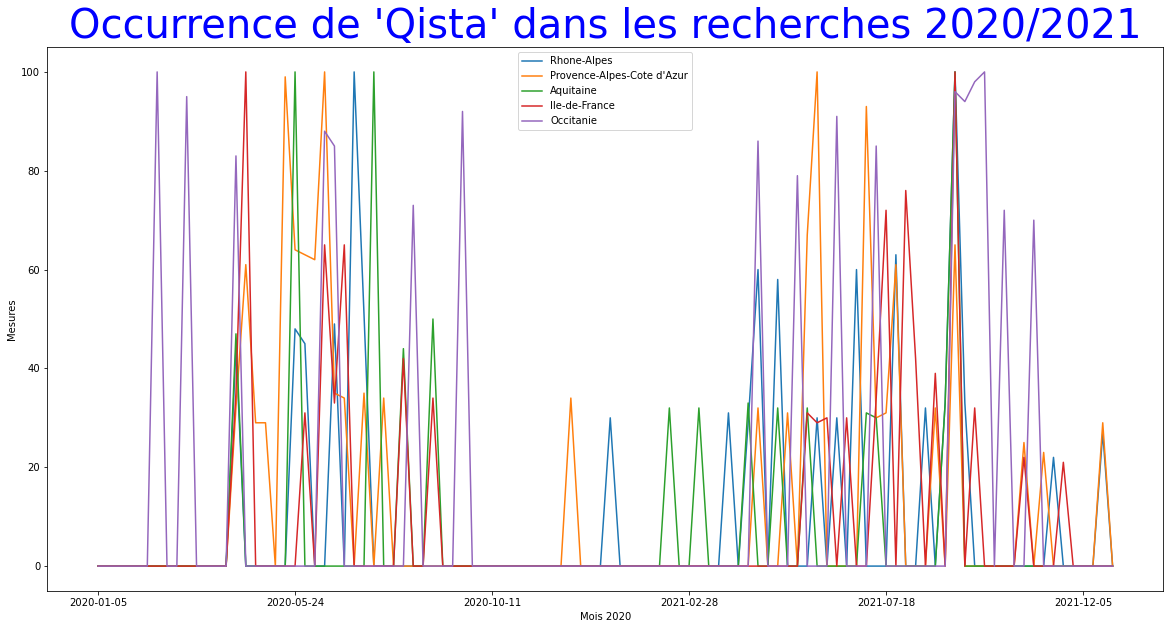

In [32]:
ax=Qista20.plot(figsize=(20,10))
plt.title(label="Occurrence de 'Qista' dans les recherches 2020/2021",
          fontsize=40,
          color="Blue")
plt.xlabel('Mois 2020')
plt.ylabel('Mesures')


In [33]:
dataqista = Qista20.reset_index()

In [34]:
Qista20.head(5)

,Rhone-Alpes,Provence-Alpes-Cote d'Azur,Aquitaine,Ile-de-France,Occitanie
Date,,,,,
2020-01-05,0,0,0,0,0
2020-01-12,0,0,0,0,0
2020-01-19,0,0,0,0,0
2020-01-26,0,0,0,0,0
2020-02-02,0,0,0,0,0


In [35]:
Qista20 = dataqista.melt(id_vars=["Date"],
               var_name="Region",
              value_name="occurrence 'Qista' 20")
#faire un pivot stylé

In [36]:
Qista20

,Date,Region,occurrence 'Qista' 20
0,2020-01-05,Rhone-Alpes,0
1,2020-01-12,Rhone-Alpes,0
2,2020-01-19,Rhone-Alpes,0
3,2020-01-26,Rhone-Alpes,0
4,2020-02-02,Rhone-Alpes,0
...,...,...,...
515,2021-11-28,Occitanie,0
516,2021-12-05,Occitanie,0
517,2021-12-12,Occitanie,0
518,2021-12-19,Occitanie,0


In [37]:
import os 
os.makedirs('Data', exist_ok=True)
Qista20.to_csv('Data/Qista2240.csv')
#faire passer en csv

In [38]:
DF=pd.read_csv('Data/Final_Dataset.csv',sep=';')

In [39]:
DF

,Unnamed: 0,Dates,Region,NbrCustomers,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique,Revenu Moyen
0,0,01/01/2020,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,9,3,3,0,82,1032,0.4,0,0,2606
1,1,02/01/2020,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,8,13,1,91,1022,0.4,0,0,2606
2,2,03/01/2020,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,12,8,20,3,71,1009,0.4,0,0,2606
3,3,04/01/2020,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,16,5,6,0,71,1021,0.4,0,0,2606
4,4,05/01/2020,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,14,10,13,16,83,1014,0.4,0,0,2606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,3650,27/12/2021,Provence-Alpes-Cote d'Azur,0.0,9.0,5.0,13.0,"23,08",6.23,00:03:36,12,10,25,3,89,1009,1.0,0,0,2306
3651,3651,28/12/2021,Provence-Alpes-Cote d'Azur,0.0,17.0,13.0,18.0,"22,22",5.00,00:02:39,17,11,29,1,87,1012,1.0,0,0,2306
3652,3652,29/12/2021,Provence-Alpes-Cote d'Azur,0.0,22.0,17.0,26.0,"46,15",2.46,00:11:12,17,13,37,0,88,1017,1.0,0,0,2306
3653,3653,30/12/2021,Provence-Alpes-Cote d'Azur,0.0,34.0,29.0,45.0,"26,67",3.07,00:04:32,19,15,45,0,81,1024,1.0,0,0,2306


In [40]:
DF.drop_duplicates

<bound method DataFrame.drop_duplicates of       Unnamed: 0       Dates                      Region  NbrCustomers  \
0              0  01/01/2020                 Rhone-Alpes           0.0   
1              1  02/01/2020                 Rhone-Alpes           0.0   
2              2  03/01/2020                 Rhone-Alpes           0.0   
3              3  04/01/2020                 Rhone-Alpes           1.0   
4              4  05/01/2020                 Rhone-Alpes           0.0   
...          ...         ...                         ...           ...   
3650        3650  27/12/2021  Provence-Alpes-Cote d'Azur           0.0   
3651        3651  28/12/2021  Provence-Alpes-Cote d'Azur           0.0   
3652        3652  29/12/2021  Provence-Alpes-Cote d'Azur           0.0   
3653        3653  30/12/2021  Provence-Alpes-Cote d'Azur           0.0   
3654        3654  31/12/2021  Provence-Alpes-Cote d'Azur           0.0   

      Utilisateurs  Nouveaux utilisateurs  Sessions Taux de rebond  

In [41]:
del DF['Unnamed: 0']

In [42]:
DF

,Dates,Region,NbrCustomers,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique,Revenu Moyen
0,01/01/2020,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,9,3,3,0,82,1032,0.4,0,0,2606
1,02/01/2020,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,8,13,1,91,1022,0.4,0,0,2606
2,03/01/2020,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,12,8,20,3,71,1009,0.4,0,0,2606
3,04/01/2020,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,16,5,6,0,71,1021,0.4,0,0,2606
4,05/01/2020,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,14,10,13,16,83,1014,0.4,0,0,2606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,27/12/2021,Provence-Alpes-Cote d'Azur,0.0,9.0,5.0,13.0,"23,08",6.23,00:03:36,12,10,25,3,89,1009,1.0,0,0,2306
3651,28/12/2021,Provence-Alpes-Cote d'Azur,0.0,17.0,13.0,18.0,"22,22",5.00,00:02:39,17,11,29,1,87,1012,1.0,0,0,2306
3652,29/12/2021,Provence-Alpes-Cote d'Azur,0.0,22.0,17.0,26.0,"46,15",2.46,00:11:12,17,13,37,0,88,1017,1.0,0,0,2306
3653,30/12/2021,Provence-Alpes-Cote d'Azur,0.0,34.0,29.0,45.0,"26,67",3.07,00:04:32,19,15,45,0,81,1024,1.0,0,0,2306


In [43]:
DFIDF=DF[DF["Region"]=="Ile-de-France"] 

In [44]:
DFIDF

,Dates,Region,NbrCustomers,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique,Revenu Moyen
731,01/01/2020,Ile-de-France,0.0,20.0,15.0,22.0,"54,55",2.32,00:02:16,6,3,5,0,86,1032,0.7,0,0,2741
732,02/01/2020,Ile-de-France,0.0,12.0,9.0,12.0,"41,67",2.42,00:02:18,14,12,26,15,90,1017,0.7,0,0,2741
733,03/01/2020,Ile-de-France,0.0,11.0,9.0,13.0,"53,85",1.85,00:02:55,8,5,24,10,76,1000,0.7,0,0,2741
734,04/01/2020,Ile-de-France,0.0,11.0,11.0,15.0,"46,67",3.67,00:01:51,14,5,11,0,55,1026,0.7,0,0,2741
735,05/01/2020,Ile-de-France,0.0,5.0,4.0,5.0,"40,00",2.40,00:01:36,17,10,24,3,76,1006,0.7,0,9,2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,27/12/2021,Ile-de-France,0.0,38.0,36.0,39.0,"46,15",3.15,00:01:49,11,8,17,2,92,1004,0.7,0,0,2741
1458,28/12/2021,Ile-de-France,0.0,37.0,32.0,38.0,"28,95",4.84,00:01:54,12,11,26,1,84,1005,0.7,0,0,2741
1459,29/12/2021,Ile-de-France,0.0,38.0,33.0,41.0,"41,46",2.88,00:01:29,15,12,23,1,94,1013,0.7,0,0,2741
1460,30/12/2021,Ile-de-France,0.0,43.0,37.0,45.0,"48,89",1.73,00:01:30,14,13,14,1,91,1024,0.7,0,0,2741


In [45]:
DFIDF.sum(axis=0,skipna=True)

Dates                          01/01/202002/01/202003/01/202004/01/202005/01/...
Region                         Ile-de-FranceIle-de-FranceIle-de-FranceIle-de-...
NbrCustomers                                                               103.0
Utilisateurs                                                            111425.0
Nouveaux utilisateurs                                                    95052.0
Sessions                                                                128533.0
Taux de rebond                 54,55 41,67 53,85 46,67 40,00 46,67 50,00 71,4...
Pages/session                                                             1999.9
Durée moyenne des sessions     00:02:1600:02:1800:02:5500:01:5100:01:3600:04:...
Tempmax_°C                                                                 12173
Tempmin_°C                                                                  7893
Vitesse_vent_km/h                                                          11208
Precipitation_mm            

In [46]:
DFIDF.head(365)
DFIDF=DFIDF[366:]

In [47]:
DFIDF

,Dates,Region,NbrCustomers,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique,Revenu Moyen
1097,01/01/2021,Ile-de-France,0.0,12.0,11.0,19.0,"57,89",1.95,00:01:49,3,2,7,1,86,1014,0.7,0,0,2741
1098,02/01/2021,Ile-de-France,0.0,13.0,11.0,14.0,"57,14",2.07,00:01:12,10,9,10,8,94,1004,0.7,0,0,2741
1099,03/01/2021,Ile-de-France,0.0,17.0,15.0,17.0,"76,47",3.00,00:01:38,14,6,11,0,75,1031,0.7,0,7,2741
1100,04/01/2021,Ile-de-France,0.0,21.0,19.0,27.0,"55,56",2.07,00:01:18,24,16,14,0,73,1021,0.7,0,0,2741
1101,05/01/2021,Ile-de-France,0.0,192.0,183.0,234.0,"55,13",2.15,00:02:12,15,7,14,0,68,1014,0.7,0,0,2741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,27/12/2021,Ile-de-France,0.0,38.0,36.0,39.0,"46,15",3.15,00:01:49,11,8,17,2,92,1004,0.7,0,0,2741
1458,28/12/2021,Ile-de-France,0.0,37.0,32.0,38.0,"28,95",4.84,00:01:54,12,11,26,1,84,1005,0.7,0,0,2741
1459,29/12/2021,Ile-de-France,0.0,38.0,33.0,41.0,"41,46",2.88,00:01:29,15,12,23,1,94,1013,0.7,0,0,2741
1460,30/12/2021,Ile-de-France,0.0,43.0,37.0,45.0,"48,89",1.73,00:01:30,14,13,14,1,91,1024,0.7,0,0,2741


In [48]:
DFIDF.sum(axis=0,skipna=True)

Dates                          01/01/202102/01/202103/01/202104/01/202105/01/...
Region                         Ile-de-FranceIle-de-FranceIle-de-FranceIle-de-...
NbrCustomers                                                                58.0
Utilisateurs                                                             67228.0
Nouveaux utilisateurs                                                    57046.0
Sessions                                                                 77178.0
Taux de rebond                 57,89 57,14 76,47 55,56 55,13 70,00 72,22 77,7...
Pages/session                                                            1174.72
Durée moyenne des sessions     00:01:4900:01:1200:01:3800:01:1800:02:1200:02:...
Tempmax_°C                                                                  5837
Tempmin_°C                                                                  3607
Vitesse_vent_km/h                                                           5390
Precipitation_mm            

In [49]:
del DFIDF['Revenu Moyen']

In [50]:
del DFIDF['occurrence du mot Qista']

In [51]:
del DFIDF['occurrence du mot Moustique']

In [52]:
del DFIDF['facteur villes vertes']

In [53]:
del DFIDF['Pression_hpa']

In [54]:
del DFIDF['Humidite_%']

In [55]:
del DFIDF['Tempmax_°C']

In [56]:
del DFIDF['Tempmin_°C']

In [57]:
del DFIDF['Vitesse_vent_km/h']

In [58]:
del DFIDF['Precipitation_mm']

In [59]:
DFIDF

,Dates,Region,NbrCustomers,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions
1097,01/01/2021,Ile-de-France,0.0,12.0,11.0,19.0,"57,89",1.95,00:01:49
1098,02/01/2021,Ile-de-France,0.0,13.0,11.0,14.0,"57,14",2.07,00:01:12
1099,03/01/2021,Ile-de-France,0.0,17.0,15.0,17.0,"76,47",3.00,00:01:38
1100,04/01/2021,Ile-de-France,0.0,21.0,19.0,27.0,"55,56",2.07,00:01:18
1101,05/01/2021,Ile-de-France,0.0,192.0,183.0,234.0,"55,13",2.15,00:02:12
...,...,...,...,...,...,...,...,...,...
1457,27/12/2021,Ile-de-France,0.0,38.0,36.0,39.0,"46,15",3.15,00:01:49
1458,28/12/2021,Ile-de-France,0.0,37.0,32.0,38.0,"28,95",4.84,00:01:54
1459,29/12/2021,Ile-de-France,0.0,38.0,33.0,41.0,"41,46",2.88,00:01:29
1460,30/12/2021,Ile-de-France,0.0,43.0,37.0,45.0,"48,89",1.73,00:01:30


In [60]:
del DFIDF['Nouveaux utilisateurs']

In [61]:
del DFIDF['Sessions']

In [62]:
del DFIDF['Taux de rebond']

In [63]:
del DFIDF['Pages/session']

In [64]:
del DFIDF['Durée moyenne des sessions']

In [65]:
del DFIDF['Region']

In [66]:
DFIDF

,Dates,NbrCustomers,Utilisateurs
1097,01/01/2021,0.0,12.0
1098,02/01/2021,0.0,13.0
1099,03/01/2021,0.0,17.0
1100,04/01/2021,0.0,21.0
1101,05/01/2021,0.0,192.0
...,...,...,...
1457,27/12/2021,0.0,38.0
1458,28/12/2021,0.0,37.0
1459,29/12/2021,0.0,38.0
1460,30/12/2021,0.0,43.0


In [67]:
index= DFIDF['Dates']
DFIDF.index=pd.to_datetime(DFIDF.index)
DFIDF.set_index(DFIDF['Dates'])

,Dates,NbrCustomers,Utilisateurs
Dates,,,
01/01/2021,01/01/2021,0.0,12.0
02/01/2021,02/01/2021,0.0,13.0
03/01/2021,03/01/2021,0.0,17.0
04/01/2021,04/01/2021,0.0,21.0
05/01/2021,05/01/2021,0.0,192.0
...,...,...,...
27/12/2021,27/12/2021,0.0,38.0
28/12/2021,28/12/2021,0.0,37.0
29/12/2021,29/12/2021,0.0,38.0


In [68]:
DFIDF.sum(axis=0,skipna=True)

Dates           01/01/202102/01/202103/01/202104/01/202105/01/...
NbrCustomers                                                 58.0
Utilisateurs                                              67228.0
dtype: object

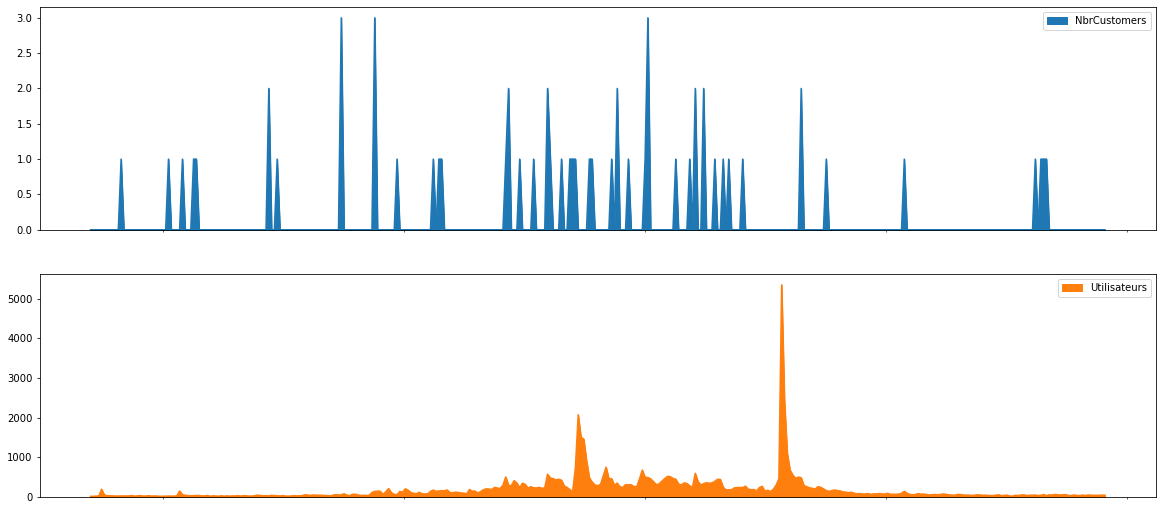

In [69]:
axs = DFIDF.plot.area(figsize=(20, 10), subplots=True)

Text(0, 0.5, 'Mesures')

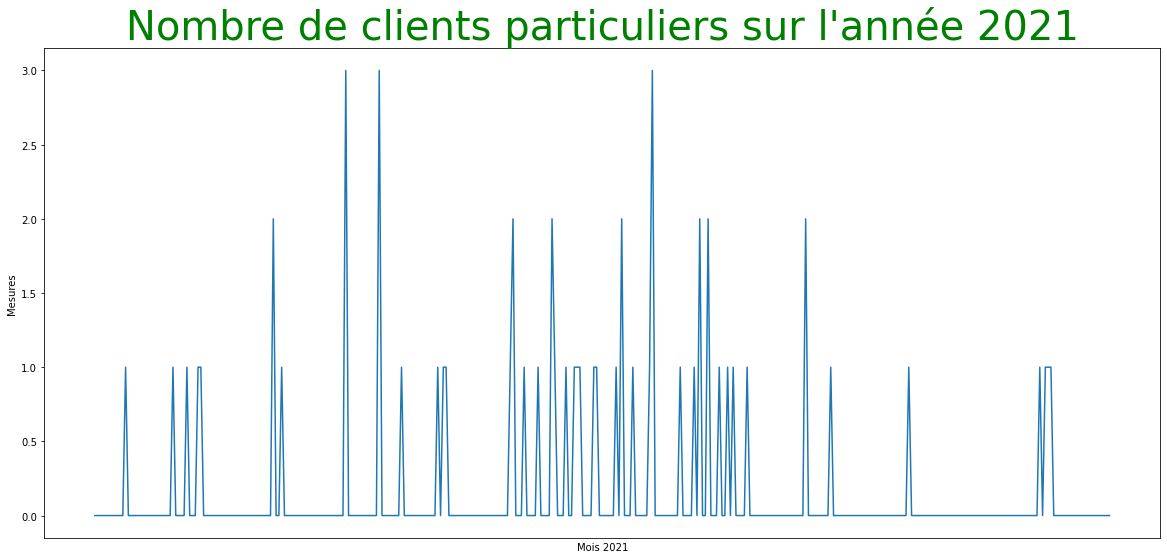

In [70]:
ax=DFIDF['NbrCustomers'].plot(figsize=(20,10))
plt.title(label="Nombre de clients particuliers sur l'année 2021",
          fontsize=40,
          color="GREEN")
plt.xlabel('Mois 2021')
plt.ylabel('Mesures')

Text(0, 0.5, 'Mesures')

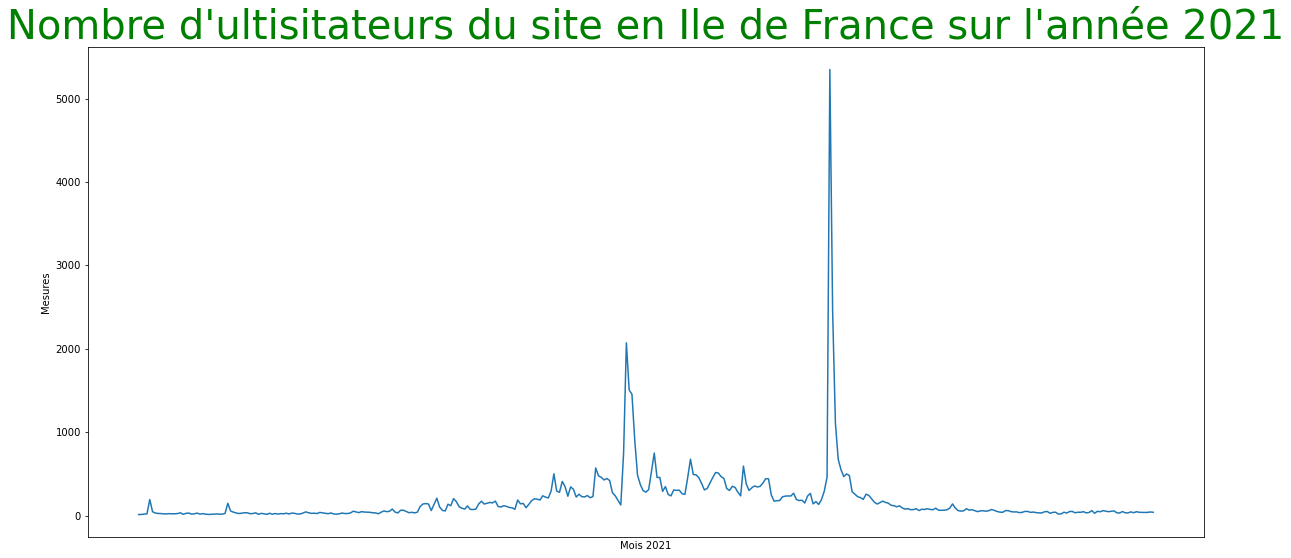

In [71]:
ax=DFIDF['Utilisateurs'].plot(figsize=(20,10))
plt.title(label="Nombre d'ultisitateurs du site en Ile de France sur l'année 2021",
          fontsize=40,
          color="GREEN")
plt.xlabel('Mois 2021')
plt.ylabel('Mesures')

In [72]:
DF

,Dates,Region,NbrCustomers,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique,Revenu Moyen
0,01/01/2020,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,9,3,3,0,82,1032,0.4,0,0,2606
1,02/01/2020,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,8,13,1,91,1022,0.4,0,0,2606
2,03/01/2020,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,12,8,20,3,71,1009,0.4,0,0,2606
3,04/01/2020,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,16,5,6,0,71,1021,0.4,0,0,2606
4,05/01/2020,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,14,10,13,16,83,1014,0.4,0,0,2606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,27/12/2021,Provence-Alpes-Cote d'Azur,0.0,9.0,5.0,13.0,"23,08",6.23,00:03:36,12,10,25,3,89,1009,1.0,0,0,2306
3651,28/12/2021,Provence-Alpes-Cote d'Azur,0.0,17.0,13.0,18.0,"22,22",5.00,00:02:39,17,11,29,1,87,1012,1.0,0,0,2306
3652,29/12/2021,Provence-Alpes-Cote d'Azur,0.0,22.0,17.0,26.0,"46,15",2.46,00:11:12,17,13,37,0,88,1017,1.0,0,0,2306
3653,30/12/2021,Provence-Alpes-Cote d'Azur,0.0,34.0,29.0,45.0,"26,67",3.07,00:04:32,19,15,45,0,81,1024,1.0,0,0,2306


In [73]:
def imputation(df):
    return df.dropna(axis=0)

In [74]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

In [75]:
from sklearn.model_selection import learning_curve

In [76]:
del DF['Revenu Moyen']

In [77]:
df = DF.copy()

In [78]:
df.shape #lignesEtcolonnes

(3655, 18)

<AxesSubplot:ylabel='None'>

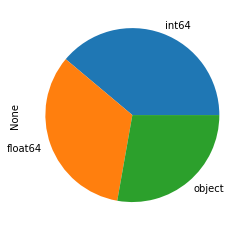

In [79]:
df.dtypes.value_counts().plot.pie()

In [80]:
df.head()

,Dates,Region,NbrCustomers,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique
0,01/01/2020,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,9,3,3,0,82,1032,0.4,0,0
1,02/01/2020,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,8,13,1,91,1022,0.4,0,0
2,03/01/2020,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,12,8,20,3,71,1009,0.4,0,0
3,04/01/2020,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,16,5,6,0,71,1021,0.4,0,0
4,05/01/2020,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,14,10,13,16,83,1014,0.4,0,0


In [81]:
df.isna().sum()/df.shape[0]

Dates                          0.000000
Region                         0.000000
NbrCustomers                   0.000000
Utilisateurs                   0.000547
Nouveaux utilisateurs          0.000547
Sessions                       0.000547
Taux de rebond                 0.000547
Pages/session                  0.000547
Durée moyenne des sessions     0.000547
Tempmax_°C                     0.000000
Tempmin_°C                     0.000000
Vitesse_vent_km/h              0.000000
Precipitation_mm               0.000000
Humidite_%                     0.000000
Pression_hpa                   0.000000
facteur villes vertes          0.000000
occurrence du mot Qista        0.000000
occurrence du mot Moustique    0.000000
dtype: float64

In [82]:
df.rename(columns={'NbrCustomers': 'Nombre de clients'}, inplace=True)

In [83]:
df

,Dates,Region,Nombre de clients,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique
0,01/01/2020,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,9,3,3,0,82,1032,0.4,0,0
1,02/01/2020,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,8,13,1,91,1022,0.4,0,0
2,03/01/2020,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,12,8,20,3,71,1009,0.4,0,0
3,04/01/2020,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,16,5,6,0,71,1021,0.4,0,0
4,05/01/2020,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,14,10,13,16,83,1014,0.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,27/12/2021,Provence-Alpes-Cote d'Azur,0.0,9.0,5.0,13.0,"23,08",6.23,00:03:36,12,10,25,3,89,1009,1.0,0,0
3651,28/12/2021,Provence-Alpes-Cote d'Azur,0.0,17.0,13.0,18.0,"22,22",5.00,00:02:39,17,11,29,1,87,1012,1.0,0,0
3652,29/12/2021,Provence-Alpes-Cote d'Azur,0.0,22.0,17.0,26.0,"46,15",2.46,00:11:12,17,13,37,0,88,1017,1.0,0,0
3653,30/12/2021,Provence-Alpes-Cote d'Azur,0.0,34.0,29.0,45.0,"26,67",3.07,00:04:32,19,15,45,0,81,1024,1.0,0,0


In [84]:
##### Analyse du fond

In [85]:
df

,Dates,Region,Nombre de clients,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique
0,01/01/2020,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,9,3,3,0,82,1032,0.4,0,0
1,02/01/2020,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,8,13,1,91,1022,0.4,0,0
2,03/01/2020,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,12,8,20,3,71,1009,0.4,0,0
3,04/01/2020,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,16,5,6,0,71,1021,0.4,0,0
4,05/01/2020,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,14,10,13,16,83,1014,0.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,27/12/2021,Provence-Alpes-Cote d'Azur,0.0,9.0,5.0,13.0,"23,08",6.23,00:03:36,12,10,25,3,89,1009,1.0,0,0
3651,28/12/2021,Provence-Alpes-Cote d'Azur,0.0,17.0,13.0,18.0,"22,22",5.00,00:02:39,17,11,29,1,87,1012,1.0,0,0
3652,29/12/2021,Provence-Alpes-Cote d'Azur,0.0,22.0,17.0,26.0,"46,15",2.46,00:11:12,17,13,37,0,88,1017,1.0,0,0
3653,30/12/2021,Provence-Alpes-Cote d'Azur,0.0,34.0,29.0,45.0,"26,67",3.07,00:04:32,19,15,45,0,81,1024,1.0,0,0


In [86]:
df = df.set_index(df["Dates"])

In [87]:
df

,Dates,Region,Nombre de clients,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique
Dates,,,,,,,,,,,,,,,,,,
01/01/2020,01/01/2020,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,9,3,3,0,82,1032,0.4,0,0
02/01/2020,02/01/2020,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,8,13,1,91,1022,0.4,0,0
03/01/2020,03/01/2020,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,12,8,20,3,71,1009,0.4,0,0
04/01/2020,04/01/2020,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,16,5,6,0,71,1021,0.4,0,0
05/01/2020,05/01/2020,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,14,10,13,16,83,1014,0.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27/12/2021,27/12/2021,Provence-Alpes-Cote d'Azur,0.0,9.0,5.0,13.0,"23,08",6.23,00:03:36,12,10,25,3,89,1009,1.0,0,0
28/12/2021,28/12/2021,Provence-Alpes-Cote d'Azur,0.0,17.0,13.0,18.0,"22,22",5.00,00:02:39,17,11,29,1,87,1012,1.0,0,0
29/12/2021,29/12/2021,Provence-Alpes-Cote d'Azur,0.0,22.0,17.0,26.0,"46,15",2.46,00:11:12,17,13,37,0,88,1017,1.0,0,0


In [88]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of                  Dates                      Region  Nombre de clients  \
Dates                                                                   
01/01/2020  01/01/2020                 Rhone-Alpes                0.0   
02/01/2020  02/01/2020                 Rhone-Alpes                0.0   
03/01/2020  03/01/2020                 Rhone-Alpes                0.0   
04/01/2020  04/01/2020                 Rhone-Alpes                1.0   
05/01/2020  05/01/2020                 Rhone-Alpes                0.0   
...                ...                         ...                ...   
27/12/2021  27/12/2021  Provence-Alpes-Cote d'Azur                0.0   
28/12/2021  28/12/2021  Provence-Alpes-Cote d'Azur                0.0   
29/12/2021  29/12/2021  Provence-Alpes-Cote d'Azur                0.0   
30/12/2021  30/12/2021  Provence-Alpes-Cote d'Azur                0.0   
31/12/2021  31/12/2021  Provence-Alpes-Cote d'Azur                0.0   

       

In [89]:
df

,Dates,Region,Nombre de clients,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique
Dates,,,,,,,,,,,,,,,,,,
01/01/2020,01/01/2020,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,9,3,3,0,82,1032,0.4,0,0
02/01/2020,02/01/2020,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,8,13,1,91,1022,0.4,0,0
03/01/2020,03/01/2020,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,12,8,20,3,71,1009,0.4,0,0
04/01/2020,04/01/2020,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,16,5,6,0,71,1021,0.4,0,0
05/01/2020,05/01/2020,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,14,10,13,16,83,1014,0.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27/12/2021,27/12/2021,Provence-Alpes-Cote d'Azur,0.0,9.0,5.0,13.0,"23,08",6.23,00:03:36,12,10,25,3,89,1009,1.0,0,0
28/12/2021,28/12/2021,Provence-Alpes-Cote d'Azur,0.0,17.0,13.0,18.0,"22,22",5.00,00:02:39,17,11,29,1,87,1012,1.0,0,0
29/12/2021,29/12/2021,Provence-Alpes-Cote d'Azur,0.0,22.0,17.0,26.0,"46,15",2.46,00:11:12,17,13,37,0,88,1017,1.0,0,0


In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [91]:
model = KNeighborsClassifier()

In [92]:
y= df['Nombre de clients']

In [93]:
X=df.drop('Nombre de clients', axis=1)

In [94]:
df

,Dates,Region,Nombre de clients,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique
Dates,,,,,,,,,,,,,,,,,,
01/01/2020,01/01/2020,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,9,3,3,0,82,1032,0.4,0,0
02/01/2020,02/01/2020,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,8,13,1,91,1022,0.4,0,0
03/01/2020,03/01/2020,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,12,8,20,3,71,1009,0.4,0,0
04/01/2020,04/01/2020,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,16,5,6,0,71,1021,0.4,0,0
05/01/2020,05/01/2020,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,14,10,13,16,83,1014,0.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27/12/2021,27/12/2021,Provence-Alpes-Cote d'Azur,0.0,9.0,5.0,13.0,"23,08",6.23,00:03:36,12,10,25,3,89,1009,1.0,0,0
28/12/2021,28/12/2021,Provence-Alpes-Cote d'Azur,0.0,17.0,13.0,18.0,"22,22",5.00,00:02:39,17,11,29,1,87,1012,1.0,0,0
29/12/2021,29/12/2021,Provence-Alpes-Cote d'Azur,0.0,22.0,17.0,26.0,"46,15",2.46,00:11:12,17,13,37,0,88,1017,1.0,0,0


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss,acf,pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

In [96]:
pd.set_option('display.max_row',111)
pd.set_option('display.max_column',111)

# Loading and analyzing data 

In [97]:
dataset=pd.read_csv('data/Final_Dataset.csv', sep=';', index_col='Dates',parse_dates=True)

In [98]:
print(dataset.shape)
dataset.head()

(3655, 19)


,Unnamed: 0,Region,NbrCustomers,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique,Revenu Moyen
Dates,,,,,,,,,,,,,,,,,,,
2020-01-01,0,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,9,3,3,0,82,1032,0.4,0,0,2606
2020-02-01,1,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,8,13,1,91,1022,0.4,0,0,2606
2020-03-01,2,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,12,8,20,3,71,1009,0.4,0,0,2606
2020-04-01,3,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,16,5,6,0,71,1021,0.4,0,0,2606
2020-05-01,4,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,14,10,13,16,83,1014,0.4,0,0,2606


In [99]:
dataset.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Dates', length=3655, freq=None)

In [100]:
del dataset['Unnamed: 0']

In [101]:
dataset['TempMoy']=dataset[['Tempmin_°C','Tempmax_°C']].mean(axis=1)

In [102]:
dataset

,Region,NbrCustomers,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique,Revenu Moyen,TempMoy
Dates,,,,,,,,,,,,,,,,,,,
2020-01-01,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,9,3,3,0,82,1032,0.4,0,0,2606,6.0
2020-02-01,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,8,13,1,91,1022,0.4,0,0,2606,10.5
2020-03-01,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,12,8,20,3,71,1009,0.4,0,0,2606,10.0
2020-04-01,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,16,5,6,0,71,1021,0.4,0,0,2606,10.5
2020-05-01,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,14,10,13,16,83,1014,0.4,0,0,2606,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,Provence-Alpes-Cote d'Azur,0.0,9.0,5.0,13.0,"23,08",6.23,00:03:36,12,10,25,3,89,1009,1.0,0,0,2306,11.0
2021-12-28,Provence-Alpes-Cote d'Azur,0.0,17.0,13.0,18.0,"22,22",5.00,00:02:39,17,11,29,1,87,1012,1.0,0,0,2306,14.0
2021-12-29,Provence-Alpes-Cote d'Azur,0.0,22.0,17.0,26.0,"46,15",2.46,00:11:12,17,13,37,0,88,1017,1.0,0,0,2306,15.0


In [103]:
del dataset['Tempmin_°C']
del dataset['Tempmax_°C']

In [104]:
dataset

,Region,NbrCustomers,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique,Revenu Moyen,TempMoy
Dates,,,,,,,,,,,,,,,,,
2020-01-01,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,3,0,82,1032,0.4,0,0,2606,6.0
2020-02-01,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,1,91,1022,0.4,0,0,2606,10.5
2020-03-01,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,20,3,71,1009,0.4,0,0,2606,10.0
2020-04-01,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,6,0,71,1021,0.4,0,0,2606,10.5
2020-05-01,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,13,16,83,1014,0.4,0,0,2606,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,Provence-Alpes-Cote d'Azur,0.0,9.0,5.0,13.0,"23,08",6.23,00:03:36,25,3,89,1009,1.0,0,0,2306,11.0
2021-12-28,Provence-Alpes-Cote d'Azur,0.0,17.0,13.0,18.0,"22,22",5.00,00:02:39,29,1,87,1012,1.0,0,0,2306,14.0
2021-12-29,Provence-Alpes-Cote d'Azur,0.0,22.0,17.0,26.0,"46,15",2.46,00:11:12,37,0,88,1017,1.0,0,0,2306,15.0


In [105]:
dataset.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Dates', length=3655, freq=None)

In [106]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3655 entries, 2020-01-01 to 2021-12-31
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Region                       3655 non-null   object 
 1   NbrCustomers                 3655 non-null   float64
 2   Utilisateurs                 3653 non-null   float64
 3   Nouveaux utilisateurs        3653 non-null   float64
 4   Sessions                     3653 non-null   float64
 5   Taux de rebond               3653 non-null   object 
 6   Pages/session                3653 non-null   float64
 7   Durée moyenne des sessions   3653 non-null   object 
 8   Vitesse_vent_km/h            3655 non-null   int64  
 9   Precipitation_mm             3655 non-null   int64  
 10  Humidite_%                   3655 non-null   int64  
 11  Pression_hpa                 3655 non-null   object 
 12  facteur villes vertes        3655 non-null   float64
 13  

In [107]:
#for reg in dataset["Region"].unique():
   # df = dataset[dataset["Region"]== reg]
    # plt.figure(figsize=(20,5))
#     df.loc['2020']['NbrCustomers'].plot(label = "Number of customers in 2020")
#     df.loc['2021']['NbrCustomers'].plot(label = "Number of customers in 2021")
    # sns.distplot(df.loc['2020']['NbrCustomers'],label = "Number of customers in 2020")
    #sns.distplot(df.loc['2021']['NbrCustomers'],label = "Number of customers in 2021")
    #plt.title(reg)
    #plt.legend()
    #plt.show()

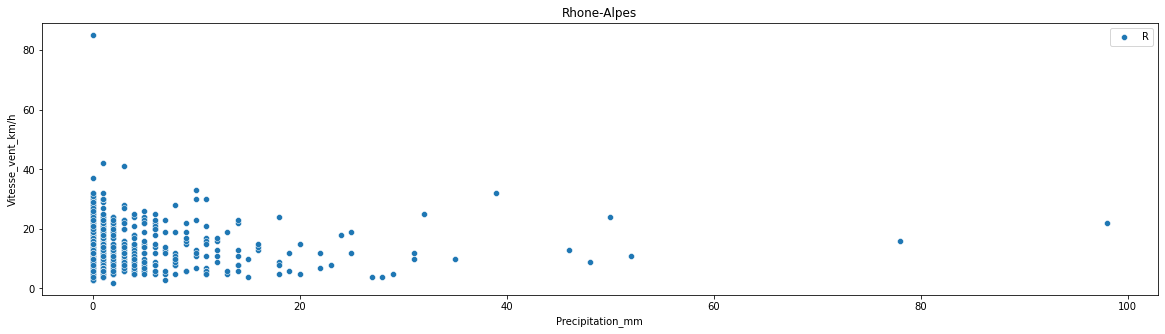

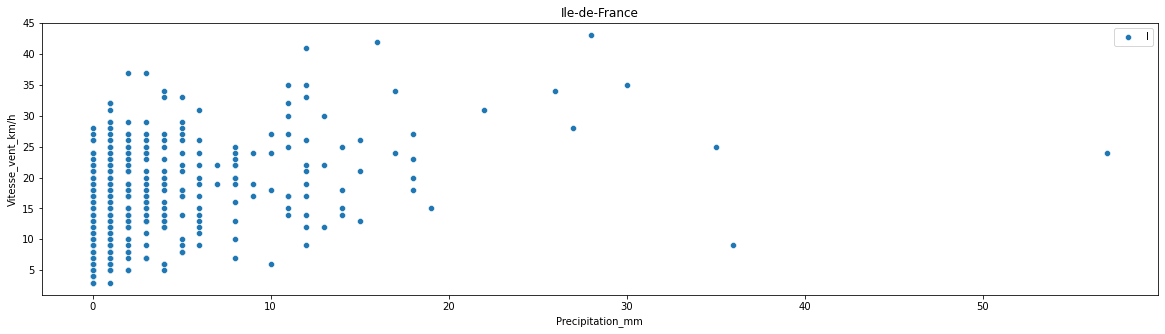

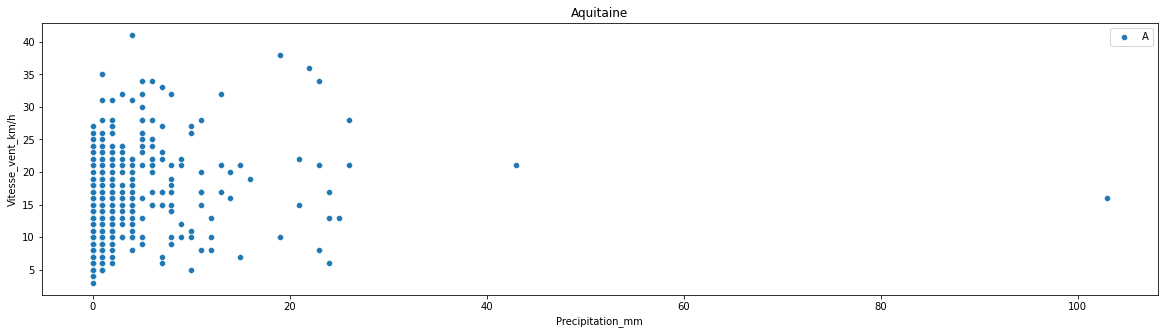

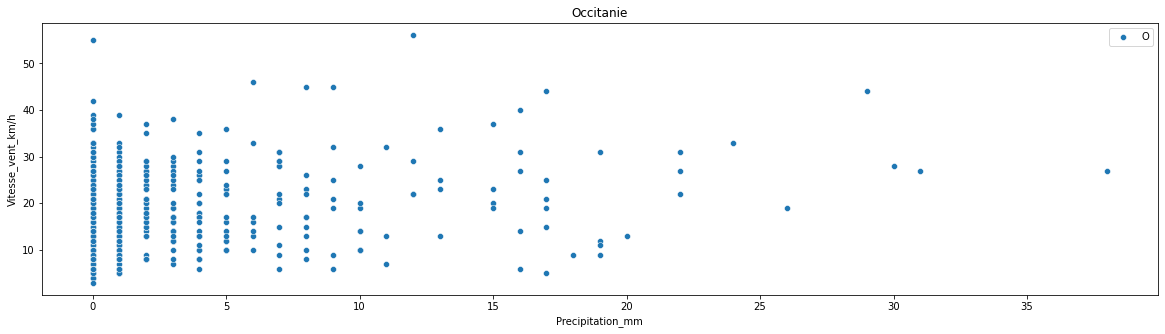

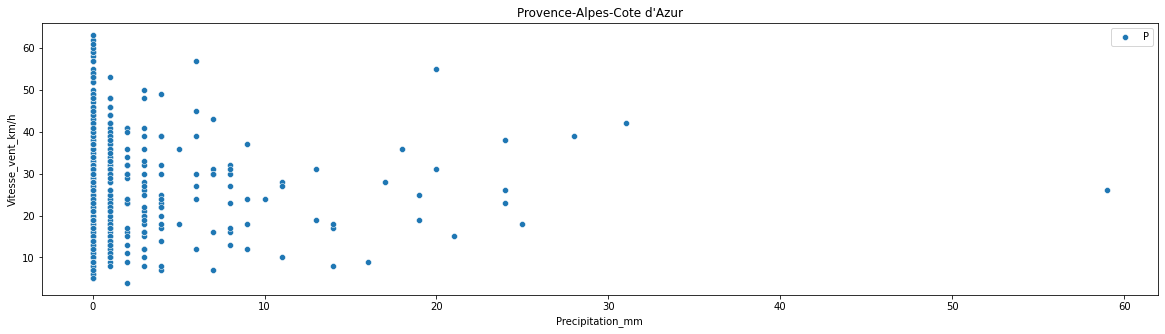

In [108]:
for reg in dataset["Region"].unique():
    df = dataset[dataset["Region"]== reg]
    plt.figure(figsize=(20,5))
    sns.scatterplot(y='Vitesse_vent_km/h',x = 'Precipitation_mm', data =df)
    #sns.distplot(df.loc['2021']['NbrCustomers'],label = "Number of customers in 2021")
    plt.title(reg)
    plt.legend(reg)
    plt.show()

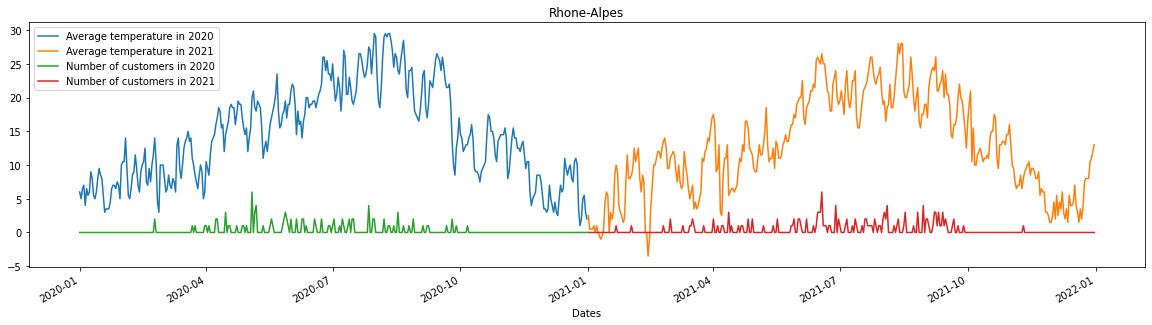

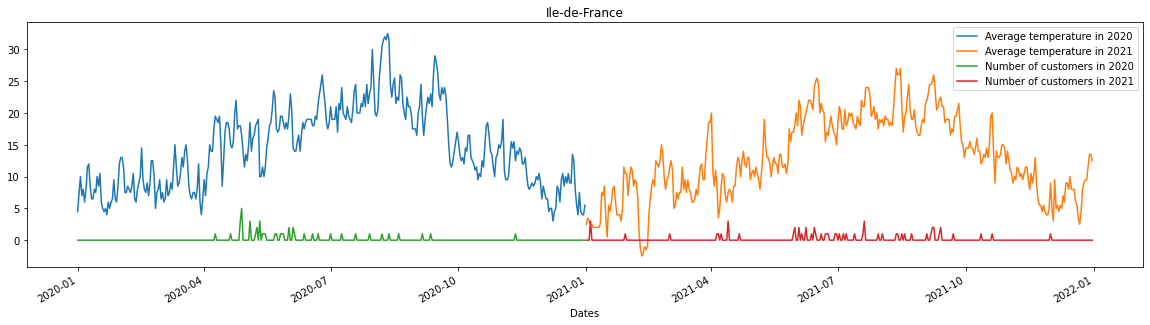

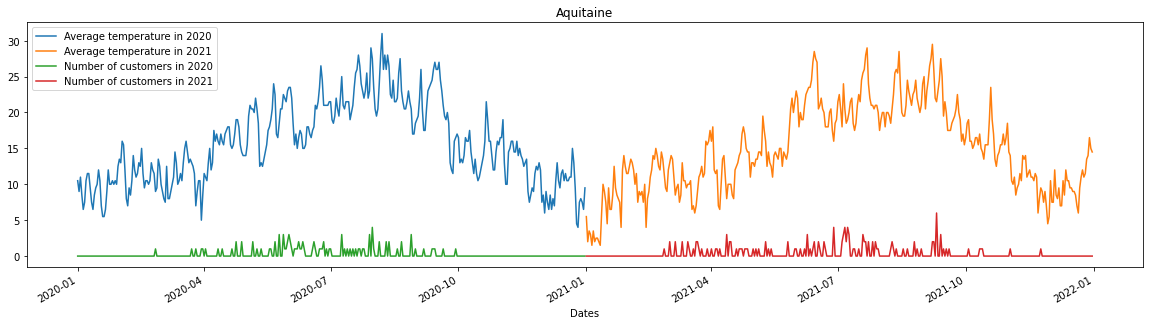

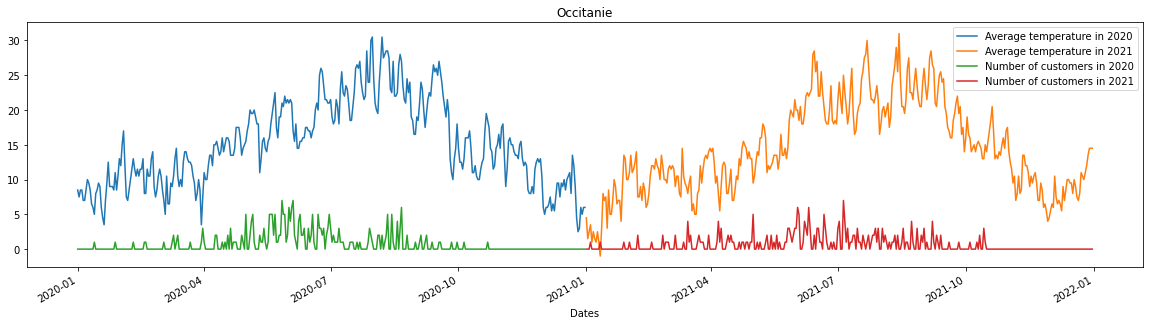

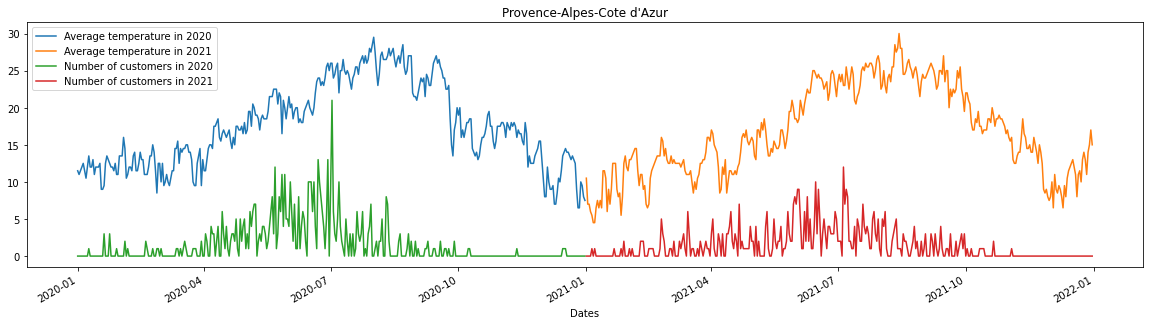

In [109]:
for reg in dataset["Region"].unique():
    df = dataset[dataset["Region"]== reg]
    plt.figure(figsize=(20,5))
    df.loc['2020']['TempMoy'].plot(label = "Average temperature in 2020")
    df.loc['2021']['TempMoy'].plot(label = "Average temperature in 2021")
    df.loc['2020']['NbrCustomers'].plot(label = "Number of customers in 2020")
    df.loc['2021']['NbrCustomers'].plot(label = "Number of customers in 2021")
#     df.loc['2020']['Precipitation_mm'].plot(label = "Precipitations in 2020")
#     df.loc['2021']['Precipitation_mm'].plot(label = "Precipitations in 2021")
    #df.loc['2020']['Utilisateurs'].plot(label = "Number of customers in 2020")
    plt.title(reg)
    plt.legend()
    plt.show()

In [110]:
dataset["Region"].unique()

array(['Rhone-Alpes', 'Ile-de-France', 'Aquitaine', 'Occitanie',
       "Provence-Alpes-Cote d'Azur"], dtype=object)

In [111]:
dataset

,Region,NbrCustomers,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique,Revenu Moyen,TempMoy
Dates,,,,,,,,,,,,,,,,,
2020-01-01,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,3,0,82,1032,0.4,0,0,2606,6.0
2020-02-01,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,1,91,1022,0.4,0,0,2606,10.5
2020-03-01,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,20,3,71,1009,0.4,0,0,2606,10.0
2020-04-01,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,6,0,71,1021,0.4,0,0,2606,10.5
2020-05-01,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,13,16,83,1014,0.4,0,0,2606,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,Provence-Alpes-Cote d'Azur,0.0,9.0,5.0,13.0,"23,08",6.23,00:03:36,25,3,89,1009,1.0,0,0,2306,11.0
2021-12-28,Provence-Alpes-Cote d'Azur,0.0,17.0,13.0,18.0,"22,22",5.00,00:02:39,29,1,87,1012,1.0,0,0,2306,14.0
2021-12-29,Provence-Alpes-Cote d'Azur,0.0,22.0,17.0,26.0,"46,15",2.46,00:11:12,37,0,88,1017,1.0,0,0,2306,15.0


In [112]:
def Nbrcustomer(data):
    if data ==0:
        return '0 clients'
    if (data >0) &(data <= 2):
        return '<2 clients'
    elif (data >2) & (data <= 4):
        return '<2-4 clients'
    elif  (data >4) & (data <= 8):
        return '<4-8 clients'
    elif (data >8) & (data <= 10):
        return '<8-10 clients'
    else:
        return '>10 clients'

In [113]:
dataset["transforme"]=dataset["NbrCustomers"].map(Nbrcustomer)

In [114]:
dataset["NbrTransforme"]=dataset["transforme"].astype('category').cat.codes

In [115]:
print(dataset['transforme'].unique(),dataset["NbrTransforme"].value_counts(normalize=True))

['0 clients' '<2 clients' '<4-8 clients' '<2-4 clients' '<8-10 clients'
 '>10 clients'] 0    0.732421
1    0.192339
2    0.045144
3    0.024624
4    0.003557
5    0.001915
Name: NbrTransforme, dtype: float64


# Correlation 

In [116]:
df[['NbrCustomers','TempMoy','Precipitation_mm','Pression_hpa','Humidite_%','Utilisateurs',
    "occurrence du mot Moustique","occurrence du mot Qista"]].corr()

,NbrCustomers,TempMoy,Precipitation_mm,Humidite_%,Utilisateurs,occurrence du mot Moustique,occurrence du mot Qista
NbrCustomers,1.000000,0.359770,-0.023524,-0.097471,0.376347,-0.009823,0.031762
TempMoy,0.359770,1.000000,-0.099863,-0.201812,0.358231,0.118368,0.052982
Precipitation_mm,-0.023524,-0.099863,1.000000,0.349987,-0.074128,-0.011124,0.022240
Humidite_%,-0.097471,-0.201812,0.349987,1.000000,-0.139828,-0.015060,-0.038051
Utilisateurs,0.376347,0.358231,-0.074128,-0.139828,1.000000,0.199021,0.144443
occurrence du mot Moustique,-0.009823,0.118368,-0.011124,-0.015060,0.199021,1.000000,0.575442
occurrence du mot Qista,0.031762,0.052982,0.022240,-0.038051,0.144443,0.575442,1.000000


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

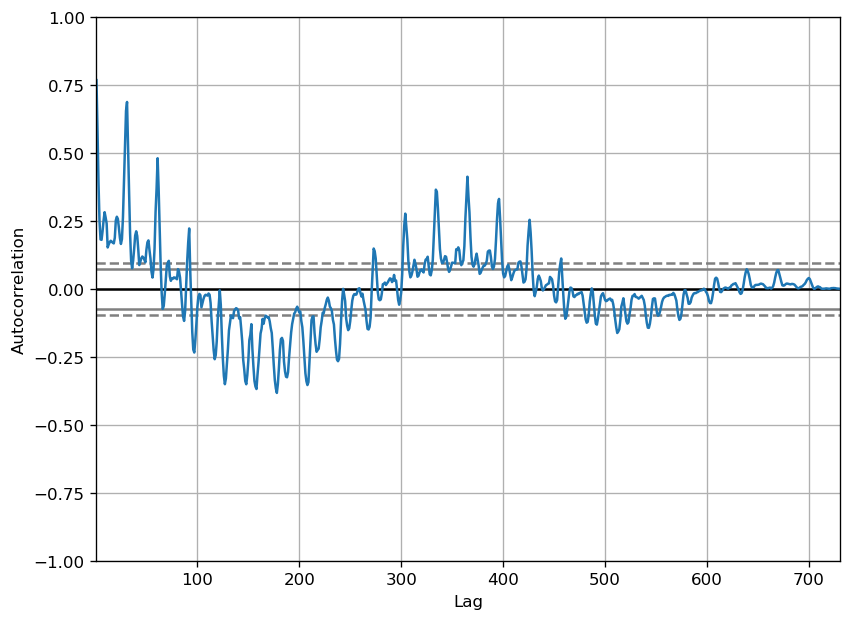

In [117]:
# Draw Plot
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':120})
autocorrelation_plot(df.TempMoy.tolist())

In [118]:
#fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
#plot_acf(df.TempMoy.tolist(), lags=700, ax=axes[0])
#plot_pacf(df.TempMoy.tolist(), lags=100, ax=axes[1])

In [119]:
AM.set_index(AM['Dates'])

,Dates,Region,occurrence d'anti-moustique
Dates,,,
2020-01-05,2020-01-05,Rhone-Alpes,9
2020-01-12,2020-01-12,Rhone-Alpes,0
2020-01-19,2020-01-19,Rhone-Alpes,5
2020-01-26,2020-01-26,Rhone-Alpes,9
2020-02-02,2020-02-02,Rhone-Alpes,4
...,...,...,...
2021-12-26,2021-12-26,Ile-de-France,2
2021-12-26,2021-12-26,Ile-de-France,2
2021-12-26,2021-12-26,Ile-de-France,2


In [120]:
os.makedirs('Data', exist_ok=True)
AM.to_csv('Data/AM.csv')

In [121]:
fin=pd.read_csv('Data/Final_Dataset.csv', sep=';')

In [122]:
del fin['Unnamed: 0']

In [123]:
fin

,Dates,Region,NbrCustomers,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique,Revenu Moyen
0,01/01/2020,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,9,3,3,0,82,1032,0.4,0,0,2606
1,02/01/2020,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,8,13,1,91,1022,0.4,0,0,2606
2,03/01/2020,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,12,8,20,3,71,1009,0.4,0,0,2606
3,04/01/2020,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,16,5,6,0,71,1021,0.4,0,0,2606
4,05/01/2020,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,14,10,13,16,83,1014,0.4,0,0,2606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,27/12/2021,Provence-Alpes-Cote d'Azur,0.0,9.0,5.0,13.0,"23,08",6.23,00:03:36,12,10,25,3,89,1009,1.0,0,0,2306
3651,28/12/2021,Provence-Alpes-Cote d'Azur,0.0,17.0,13.0,18.0,"22,22",5.00,00:02:39,17,11,29,1,87,1012,1.0,0,0,2306
3652,29/12/2021,Provence-Alpes-Cote d'Azur,0.0,22.0,17.0,26.0,"46,15",2.46,00:11:12,17,13,37,0,88,1017,1.0,0,0,2306
3653,30/12/2021,Provence-Alpes-Cote d'Azur,0.0,34.0,29.0,45.0,"26,67",3.07,00:04:32,19,15,45,0,81,1024,1.0,0,0,2306


In [124]:
AM = pd.pivot_table(AM, index='Dates', columns='Region', values="occurrence d'anti-moustique")
AM = AM.fillna(0)
#df.reset_index()
AM.index = pd.to_datetime(AM.index )
print(type(AM.index))
AM

indexes= pd.date_range(start='1/1/2020', end='31/12/2021', freq='D' )
AM = AM.reindex(indexes, fill_value=0)
AM =AM.reset_index()
AM['index']= pd.to_datetime(AM['index'])
AM

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


Region,index,Aquitaine,Ile-de-France,Occitanie,Provence-Alpes-Cote d'Azur,Rhone-Alpes
0,2020-01-01,0,0,0,0,0
1,2020-01-02,0,0,0,0,0
2,2020-01-03,0,0,0,0,0
3,2020-01-04,0,0,0,0,0
4,2020-01-05,0,0,0,4,9
...,...,...,...,...,...,...
726,2021-12-27,0,0,0,0,0
727,2021-12-28,0,0,0,0,0
728,2021-12-29,0,0,0,0,0
729,2021-12-30,0,0,0,0,0


In [125]:
AM = AM.melt(id_vars=["index"],
               var_name="Region",
              value_name="occurrence d'anti-moustique")

In [126]:
AM.rename(columns={'index': 'Dates'}, inplace=True)

In [127]:
#fin=fin.set_index(fin['Dates'])

In [128]:
#AM.reset_index(inplace=True)
#del AM['level_0']
#del AM['index']

In [129]:
#AM.rename(columns={'index': 'Dates'}, inplace=True)
#FinalDataset = fin.merge(AM,how='left', on=['Dates','Region'])

In [130]:
fin

,Dates,Region,NbrCustomers,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique,Revenu Moyen
0,01/01/2020,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,9,3,3,0,82,1032,0.4,0,0,2606
1,02/01/2020,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,8,13,1,91,1022,0.4,0,0,2606
2,03/01/2020,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,12,8,20,3,71,1009,0.4,0,0,2606
3,04/01/2020,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,16,5,6,0,71,1021,0.4,0,0,2606
4,05/01/2020,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,14,10,13,16,83,1014,0.4,0,0,2606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,27/12/2021,Provence-Alpes-Cote d'Azur,0.0,9.0,5.0,13.0,"23,08",6.23,00:03:36,12,10,25,3,89,1009,1.0,0,0,2306
3651,28/12/2021,Provence-Alpes-Cote d'Azur,0.0,17.0,13.0,18.0,"22,22",5.00,00:02:39,17,11,29,1,87,1012,1.0,0,0,2306
3652,29/12/2021,Provence-Alpes-Cote d'Azur,0.0,22.0,17.0,26.0,"46,15",2.46,00:11:12,17,13,37,0,88,1017,1.0,0,0,2306
3653,30/12/2021,Provence-Alpes-Cote d'Azur,0.0,34.0,29.0,45.0,"26,67",3.07,00:04:32,19,15,45,0,81,1024,1.0,0,0,2306


In [131]:
fin['Dates']=pd.to_datetime(fin['Dates'])
AM['Dates']=pd.to_datetime(AM['Dates'])

In [132]:
FinalDataset = fin.merge(AM,how='left', on=['Dates','Region'])

In [133]:
FinalDataset

,Dates,Region,NbrCustomers,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,Tempmax_°C,Tempmin_°C,Vitesse_vent_km/h,Precipitation_mm,Humidite_%,Pression_hpa,facteur villes vertes,occurrence du mot Qista,occurrence du mot Moustique,Revenu Moyen,occurrence d'anti-moustique
0,2020-01-01,Rhone-Alpes,0.0,12.0,8.0,13.0,"23,08",3.85,00:04:26,9,3,3,0,82,1032,0.4,0,0,2606,0
1,2020-02-01,Rhone-Alpes,0.0,6.0,5.0,6.0,"50,00",1.50,00:00:30,13,8,13,1,91,1022,0.4,0,0,2606,0
2,2020-03-01,Rhone-Alpes,0.0,7.0,6.0,7.0,"42,86",3.43,00:02:54,12,8,20,3,71,1009,0.4,0,0,2606,0
3,2020-04-01,Rhone-Alpes,1.0,11.0,7.0,11.0,"45,45",3.82,00:04:08,16,5,6,0,71,1021,0.4,0,0,2606,0
4,2020-05-01,Rhone-Alpes,0.0,7.0,5.0,7.0,"71,43",2.57,00:02:00,14,10,13,16,83,1014,0.4,0,0,2606,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3650,2021-12-27,Provence-Alpes-Cote d'Azur,0.0,9.0,5.0,13.0,"23,08",6.23,00:03:36,12,10,25,3,89,1009,1.0,0,0,2306,0
3651,2021-12-28,Provence-Alpes-Cote d'Azur,0.0,17.0,13.0,18.0,"22,22",5.00,00:02:39,17,11,29,1,87,1012,1.0,0,0,2306,0
3652,2021-12-29,Provence-Alpes-Cote d'Azur,0.0,22.0,17.0,26.0,"46,15",2.46,00:11:12,17,13,37,0,88,1017,1.0,0,0,2306,0
3653,2021-12-30,Provence-Alpes-Cote d'Azur,0.0,34.0,29.0,45.0,"26,67",3.07,00:04:32,19,15,45,0,81,1024,1.0,0,0,2306,0


In [135]:
FinalDataset=FinalDataset.set_index(['Dates'])

In [136]:
os.makedirs('Data', exist_ok=True)
FinalDataset.to_csv('Data/FinalDataset1.csv')

In [141]:
FreqSite=pd.read_csv('Data/FrequentationSite.csv', sep=';')

In [142]:
FreqSite

,Unnamed: 0,Dates,Region,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions
0,4,01/01/2020,Auvergne-Rhone-Alpes,12.0,8.0,13.0,"23,08",3.85,00:04:26
1,9,02/01/2020,Auvergne-Rhone-Alpes,6.0,5.0,6.0,"50,00",1.50,00:00:30
2,13,03/01/2020,Auvergne-Rhone-Alpes,7.0,6.0,7.0,"42,86",3.43,00:02:54
3,18,04/01/2020,Auvergne-Rhone-Alpes,11.0,7.0,11.0,"45,45",3.82,00:04:08
4,23,05/01/2020,Auvergne-Rhone-Alpes,7.0,5.0,7.0,"71,43",2.57,00:02:00
...,...,...,...,...,...,...,...,...,...
3648,3629,27/12/2021,Provence-Alpes-Cote d'Azur,9.0,5.0,13.0,"23,08",6.23,00:03:36
3649,3634,28/12/2021,Provence-Alpes-Cote d'Azur,17.0,13.0,18.0,"22,22",5.00,00:02:39
3650,3639,29/12/2021,Provence-Alpes-Cote d'Azur,22.0,17.0,26.0,"46,15",2.46,00:11:12
3651,3644,30/12/2021,Provence-Alpes-Cote d'Azur,34.0,29.0,45.0,"26,67",3.07,00:04:32


In [143]:
del FreqSite['Unnamed: 0']

In [151]:
FreqSite

,Dates,Region,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions
0,01/01/2020,Auvergne-Rhone-Alpes,12.0,8.0,13.0,"23,08",3.85,00:04:26
1,02/01/2020,Auvergne-Rhone-Alpes,6.0,5.0,6.0,"50,00",1.50,00:00:30
2,03/01/2020,Auvergne-Rhone-Alpes,7.0,6.0,7.0,"42,86",3.43,00:02:54
3,04/01/2020,Auvergne-Rhone-Alpes,11.0,7.0,11.0,"45,45",3.82,00:04:08
4,05/01/2020,Auvergne-Rhone-Alpes,7.0,5.0,7.0,"71,43",2.57,00:02:00
...,...,...,...,...,...,...,...,...
3648,27/12/2021,Provence-Alpes-Cote d'Azur,9.0,5.0,13.0,"23,08",6.23,00:03:36
3649,28/12/2021,Provence-Alpes-Cote d'Azur,17.0,13.0,18.0,"22,22",5.00,00:02:39
3650,29/12/2021,Provence-Alpes-Cote d'Azur,22.0,17.0,26.0,"46,15",2.46,00:11:12
3651,30/12/2021,Provence-Alpes-Cote d'Azur,34.0,29.0,45.0,"26,67",3.07,00:04:32


In [176]:
col_list = FreqSite['Durée moyenne des sessions'].tolist()
#for i in FreqSite['Durée moyenne des sessions']:
 #   FreqSite['Durée moyenne des sessions']=FreqSite['Durée moyenne des sessions'].split()

In [157]:
#FreqSite['Duree moy'] = pd.to_datetime(FreqSite['Durée moyenne des sessions'], format='%S').dt.time

In [177]:
for i in range(0,len(col_list)):
    M=int(col_list[i][4])
    s=int(col_list[i][6]+col_list[i][7])
    col_list[i]=M*60+s
col_list

[266,
 30,
 174,
 248,
 120,
 82,
 183,
 126,
 69,
 30,
 145,
 47,
 233,
 122,
 93,
 190,
 376,
 47,
 82,
 158,
 166,
 16,
 249,
 64,
 262,
 263,
 68,
 105,
 24,
 241,
 128,
 156,
 267,
 164,
 169,
 187,
 186,
 90,
 59,
 65,
 81,
 93,
 211,
 213,
 126,
 80,
 134,
 65,
 248,
 26,
 384,
 246,
 80,
 67,
 230,
 37,
 152,
 45,
 23,
 215,
 338,
 132,
 56,
 380,
 217,
 273,
 156,
 207,
 69,
 211,
 339,
 397,
 71,
 335,
 241,
 177,
 130,
 491,
 164,
 96,
 66,
 275,
 118,
 397,
 256,
 165,
 441,
 168,
 184,
 341,
 123,
 153,
 226,
 273,
 69,
 271,
 175,
 110,
 195,
 295,
 162,
 255,
 214,
 150,
 93,
 144,
 126,
 116,
 146,
 146,
 139,
 102,
 119,
 121,
 113,
 123,
 130,
 177,
 149,
 108,
 74,
 133,
 106,
 124,
 118,
 144,
 135,
 119,
 147,
 122,
 131,
 138,
 94,
 171,
 101,
 96,
 93,
 172,
 167,
 226,
 215,
 128,
 133,
 148,
 144,
 161,
 141,
 110,
 96,
 112,
 92,
 107,
 120,
 62,
 97,
 95,
 74,
 71,
 91,
 114,
 129,
 133,
 95,
 94,
 67,
 94,
 117,
 124,
 99,
 92,
 92,
 85,
 94,
 96,
 111,
 103

In [178]:
FreqSite["duree de frequentation en sec"]=col_list

In [179]:
FreqSite

,Dates,Region,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,duree de frequentation en sec
0,01/01/2020,Auvergne-Rhone-Alpes,12.0,8.0,13.0,"23,08",3.85,00:04:26,266
1,02/01/2020,Auvergne-Rhone-Alpes,6.0,5.0,6.0,"50,00",1.50,00:00:30,30
2,03/01/2020,Auvergne-Rhone-Alpes,7.0,6.0,7.0,"42,86",3.43,00:02:54,174
3,04/01/2020,Auvergne-Rhone-Alpes,11.0,7.0,11.0,"45,45",3.82,00:04:08,248
4,05/01/2020,Auvergne-Rhone-Alpes,7.0,5.0,7.0,"71,43",2.57,00:02:00,120
...,...,...,...,...,...,...,...,...,...
3648,27/12/2021,Provence-Alpes-Cote d'Azur,9.0,5.0,13.0,"23,08",6.23,00:03:36,216
3649,28/12/2021,Provence-Alpes-Cote d'Azur,17.0,13.0,18.0,"22,22",5.00,00:02:39,159
3650,29/12/2021,Provence-Alpes-Cote d'Azur,22.0,17.0,26.0,"46,15",2.46,00:11:12,72
3651,30/12/2021,Provence-Alpes-Cote d'Azur,34.0,29.0,45.0,"26,67",3.07,00:04:32,272


In [180]:
os.makedirs('Data', exist_ok=True)
FreqSite.to_csv('Data/FreqSite.csv')

In [181]:
FreqSite

,Dates,Region,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,duree de frequentation en sec
0,01/01/2020,Auvergne-Rhone-Alpes,12.0,8.0,13.0,"23,08",3.85,00:04:26,266
1,02/01/2020,Auvergne-Rhone-Alpes,6.0,5.0,6.0,"50,00",1.50,00:00:30,30
2,03/01/2020,Auvergne-Rhone-Alpes,7.0,6.0,7.0,"42,86",3.43,00:02:54,174
3,04/01/2020,Auvergne-Rhone-Alpes,11.0,7.0,11.0,"45,45",3.82,00:04:08,248
4,05/01/2020,Auvergne-Rhone-Alpes,7.0,5.0,7.0,"71,43",2.57,00:02:00,120
...,...,...,...,...,...,...,...,...,...
3648,27/12/2021,Provence-Alpes-Cote d'Azur,9.0,5.0,13.0,"23,08",6.23,00:03:36,216
3649,28/12/2021,Provence-Alpes-Cote d'Azur,17.0,13.0,18.0,"22,22",5.00,00:02:39,159
3650,29/12/2021,Provence-Alpes-Cote d'Azur,22.0,17.0,26.0,"46,15",2.46,00:11:12,72
3651,30/12/2021,Provence-Alpes-Cote d'Azur,34.0,29.0,45.0,"26,67",3.07,00:04:32,272


In [182]:
Aqui=FreqSite[FreqSite['Region']=='Auvergne-Rhone-Alpes']

In [183]:
AURA

,Dates,Region,Utilisateurs,Nouveaux utilisateurs,Sessions,Taux de rebond,Pages/session,Durée moyenne des sessions,duree de frequentation en sec
0,01/01/2020,Auvergne-Rhone-Alpes,12.0,8.0,13.0,"23,08",3.85,00:04:26,266
1,02/01/2020,Auvergne-Rhone-Alpes,6.0,5.0,6.0,"50,00",1.50,00:00:30,30
2,03/01/2020,Auvergne-Rhone-Alpes,7.0,6.0,7.0,"42,86",3.43,00:02:54,174
3,04/01/2020,Auvergne-Rhone-Alpes,11.0,7.0,11.0,"45,45",3.82,00:04:08,248
4,05/01/2020,Auvergne-Rhone-Alpes,7.0,5.0,7.0,"71,43",2.57,00:02:00,120
...,...,...,...,...,...,...,...,...,...
726,27/12/2021,Auvergne-Rhone-Alpes,7.0,4.0,7.0,"28,57",3.14,00:01:39,99
727,28/12/2021,Auvergne-Rhone-Alpes,25.0,20.0,28.0,"14,29",7.43,00:02:26,146
728,29/12/2021,Auvergne-Rhone-Alpes,13.0,8.0,16.0,"56,25",2.12,00:01:35,95
729,30/12/2021,Auvergne-Rhone-Alpes,23.0,16.0,28.0,"28,57",2.68,00:02:56,176
